<a href="https://www.kaggle.com/code/rishukumargupta/notebook6687f867b3?scriptVersionId=128984734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-ml-data-salaries/salaries.csv


In [2]:
df=pd.read_csv('/kaggle/input/ai-ml-data-salaries/salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,AWS Data Architect,258000,USD,258000,US,100,US,L
1,2023,SE,FT,Data Scientist,225000,USD,225000,US,0,US,M
2,2023,SE,FT,Data Scientist,156400,USD,156400,US,0,US,M
3,2023,SE,FT,Data Engineer,190000,USD,190000,US,100,US,M
4,2023,SE,FT,Data Engineer,150000,USD,150000,US,100,US,M


In [4]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4129,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
4130,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
4131,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
4132,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
4133,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [5]:
df.shape

(4134, 11)

In [6]:
df['job_title'].value_counts()#.sum()

Data Engineer                         1124
Data Scientist                         919
Data Analyst                           657
Machine Learning Engineer              325
Analytics Engineer                     118
                                      ... 
Staff Data Analyst                       1
Compliance Data Analyst                  1
Sales Data Analyst                       1
Autonomous Vehicle Operations Lead       1
Staff Data Scientist                     1
Name: job_title, Length: 99, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4134 non-null   int64 
 1   experience_level    4134 non-null   object
 2   employment_type     4134 non-null   object
 3   job_title           4134 non-null   object
 4   salary              4134 non-null   int64 
 5   salary_currency     4134 non-null   object
 6   salary_in_usd       4134 non-null   int64 
 7   employee_residence  4134 non-null   object
 8   remote_ratio        4134 non-null   int64 
 9   company_location    4134 non-null   object
 10  company_size        4134 non-null   object
dtypes: int64(4), object(7)
memory usage: 355.4+ KB


In [8]:
df['salary_currency'].unique()

array(['USD', 'INR', 'GBP', 'EUR', 'CAD', 'JPY', 'PHP', 'ZAR', 'HKD',
       'CHF', 'AUD', 'SGD', 'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK',
       'DKK', 'MXN', 'TRY', 'CLP'], dtype=object)

In [9]:
df['employee_residence'].unique()

array(['US', 'AU', 'AE', 'IN', 'BO', 'DE', 'GB', 'CO', 'EG', 'NG', 'CA',
       'UZ', 'ES', 'FR', 'AR', 'GE', 'JP', 'PH', 'ZA', 'IT', 'HK', 'PT',
       'NL', 'CH', 'CF', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'SG', 'SE',
       'SI', 'MX', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY', 'AM', 'BA',
       'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'MA', 'LT', 'BE', 'AS', 'IR',
       'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL', 'PR', 'DK', 'DO', 'ID',
       'MY', 'EE', 'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ',
       'MD', 'LU', 'MT'], dtype=object)

**EDA (Explotry Data Analysis)**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plte

<AxesSubplot:xlabel='salary', ylabel='job_title'>

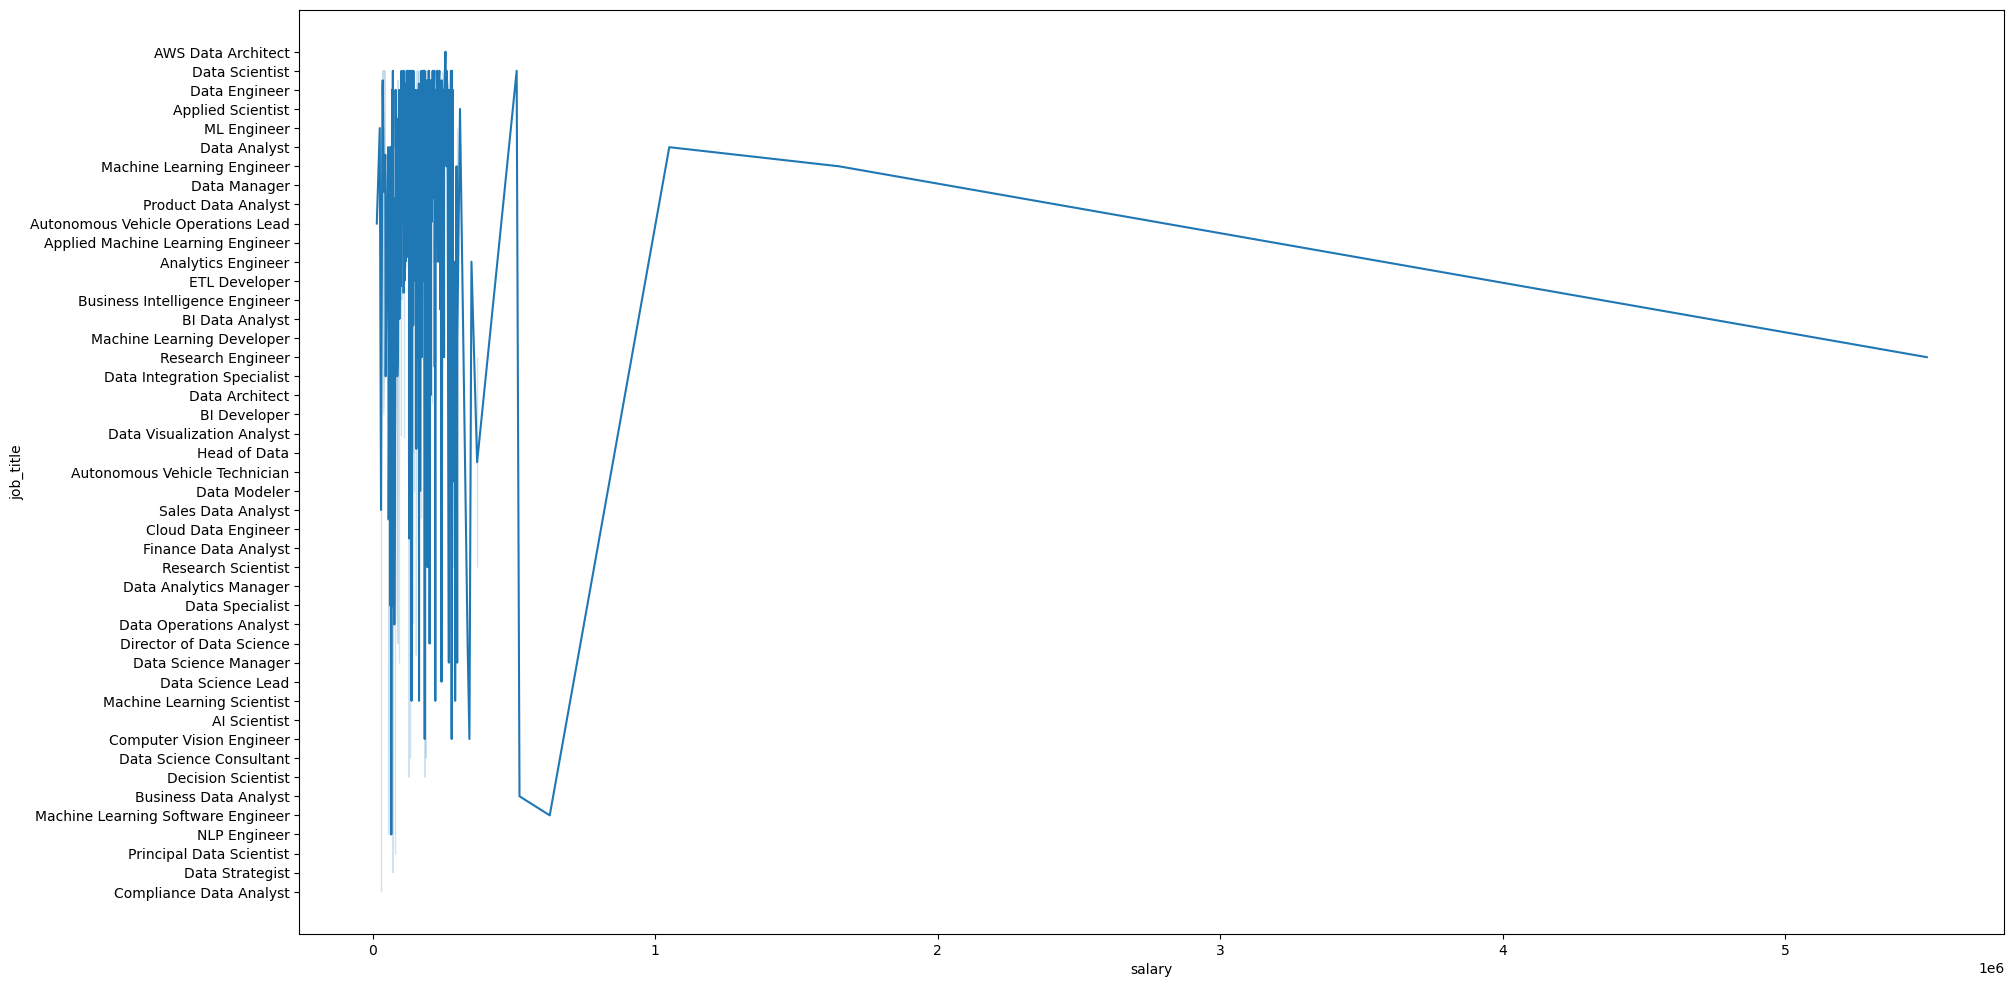

In [11]:
plot_df=df[:500]
plt.figure(figsize=(22,12))
sns.lineplot(x=plot_df['salary'],y=plot_df['job_title'])

<AxesSubplot:xlabel='salary', ylabel='job_title'>

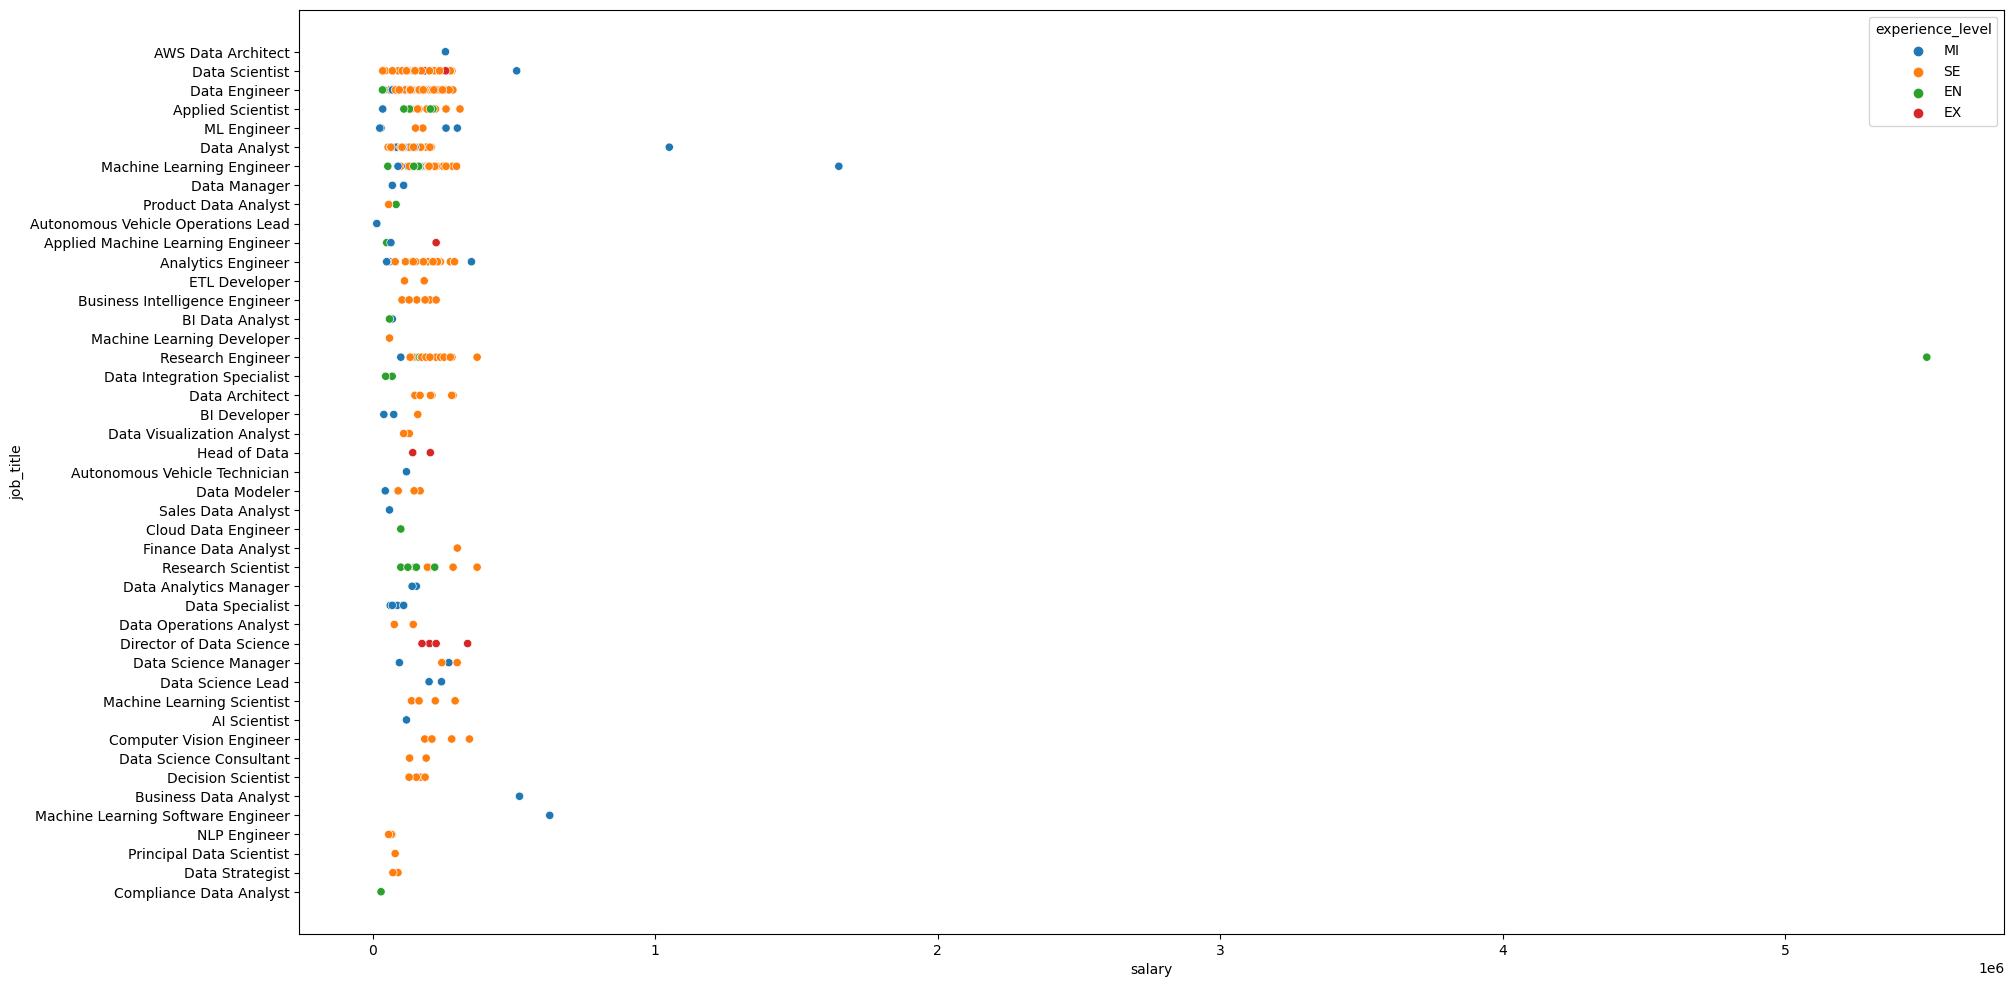

In [12]:
plot_df=df[:500]
plt.figure(figsize=(22,12))
sns.scatterplot(x=plot_df['salary'],y=plot_df['job_title'],hue=plot_df['experience_level'])

<AxesSubplot:xlabel='salary', ylabel='job_title'>

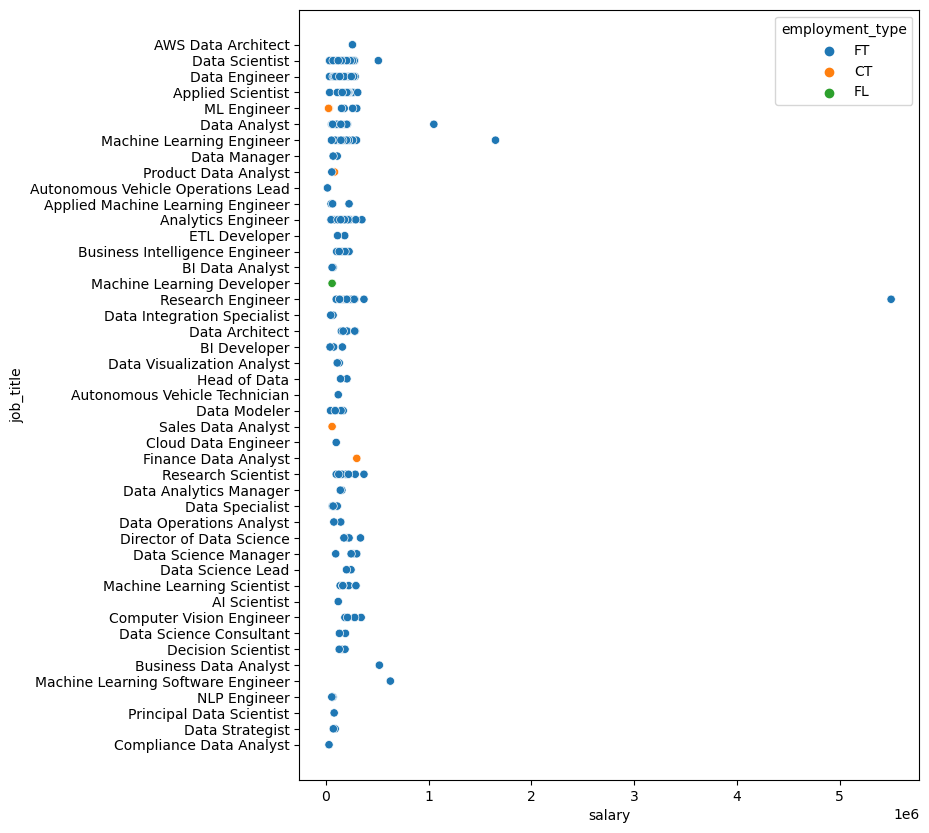

In [13]:
plot_df=df[:500]
plt.figure(figsize=(8,10))
sns.scatterplot(x=plot_df['salary'],y=plot_df['job_title'],hue=plot_df['employment_type'])

<AxesSubplot:xlabel='remote_ratio', ylabel='Count'>

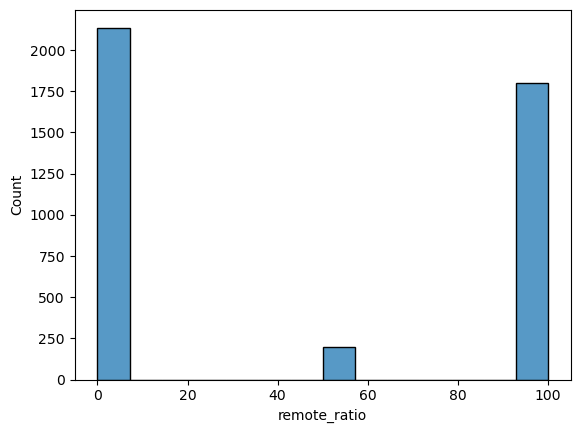

In [14]:
sns.histplot(df['remote_ratio'])

<Figure size 2200x800 with 0 Axes>

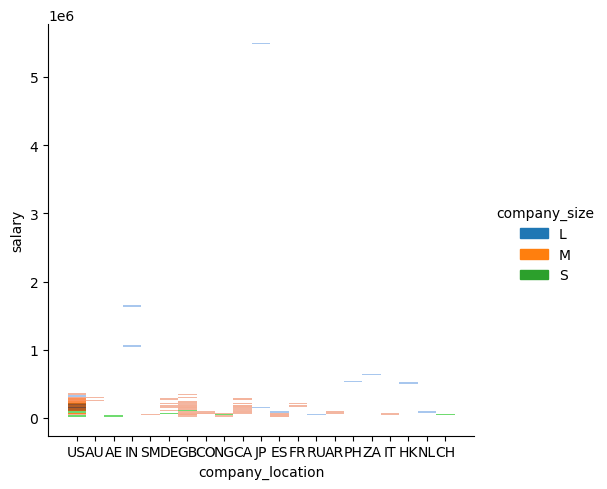

In [15]:
plot_df=df[:500]
plt.figure(figsize=(22,8))
sns.displot(y=plot_df['salary'],x=plot_df['company_location'],hue=plot_df['company_size'])

<AxesSubplot:ylabel='salary'>

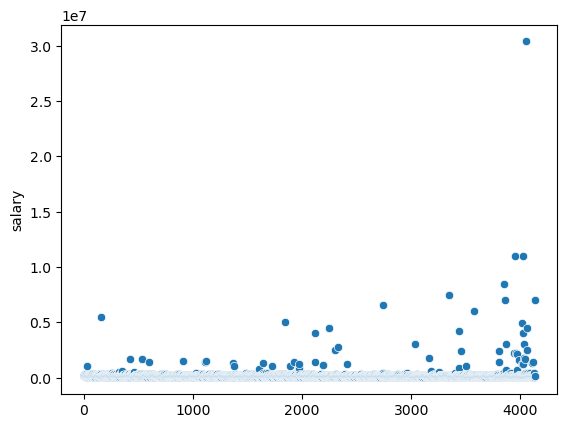

In [16]:
sns.scatterplot(df['salary'])

In [17]:
new_df=df.drop(columns=['salary_in_usd','salary_currency','remote_ratio'])

In [18]:
new_df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,company_location,company_size
0,2023,MI,FT,AWS Data Architect,258000,US,US,L
1,2023,SE,FT,Data Scientist,225000,US,US,M
2,2023,SE,FT,Data Scientist,156400,US,US,M
3,2023,SE,FT,Data Engineer,190000,US,US,M
4,2023,SE,FT,Data Engineer,150000,US,US,M


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4134 non-null   int64 
 1   experience_level    4134 non-null   object
 2   employment_type     4134 non-null   object
 3   job_title           4134 non-null   object
 4   salary              4134 non-null   int64 
 5   employee_residence  4134 non-null   object
 6   company_location    4134 non-null   object
 7   company_size        4134 non-null   object
dtypes: int64(2), object(6)
memory usage: 258.5+ KB


In [20]:
new_df.shape

(4134, 8)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


<AxesSubplot:xlabel='work_year', ylabel='Density'>

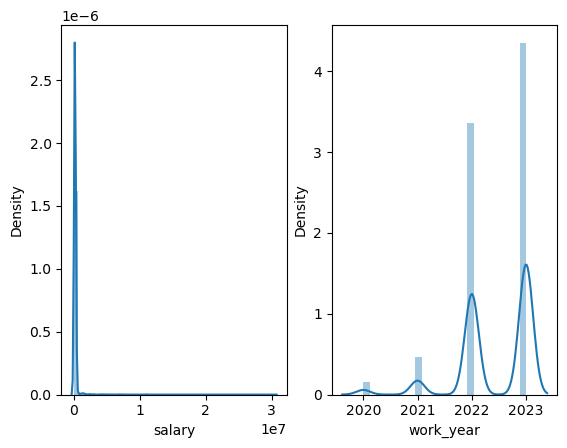

In [21]:
plt.subplot(1,2,1)
sns.distplot(new_df['salary'])
plt.subplot(1,2,2)
sns.distplot(new_df['work_year'])

In [22]:
df['salary'].skew()

29.683030046680013

In [23]:
df['work_year'].skew()

-1.1372392846067831

In [24]:
df['salary_in_usd'].skew()

0.5284682673301179

In [25]:
df['remote_ratio'].skew()

0.16299880262787703

In [26]:
df['salary'].describe()

count    4.134000e+03
mean     1.894287e+05
std      6.460075e+05
min      6.000000e+03
25%      1.000000e+05
50%      1.400000e+05
75%      1.833100e+05
max      3.040000e+07
Name: salary, dtype: float64

In [27]:
print("Mean value of salary ", df['salary'].mean())
print("Std value of salary",df['salary'].std())
print("Min value of salary ",df['salary'].min())
print("Max value of salary ",df['salary'].max())

Mean value of salary  189428.71432027093
Std value of salary 646007.52674698
Min value of salary  6000
Max value of salary  30400000


In [28]:
print("Highest allowed ",df['salary'].mean()+3*df['salary'].std())
print("Lowest allowed ",df['salary'].mean()-3*df['salary'].std())

Highest allowed  2127451.294561211
Lowest allowed  -1748593.8659206694


In [29]:
df.shape

(4134, 11)

In [30]:
df[(df['salary']>2127451.29) | (df['salary']<-1748593.86)].shape

(27, 11)

Capping for removing the outliers

In [31]:
upper_limit=df['salary'].mean()+3*df['salary'].std()
lower_limit =df['salary'].mean()-3*df['salary'].std()

In [32]:
upper_limit,lower_limit

(2127451.294561211, -1748593.8659206694)

In [33]:
df['salary']=np.where(
df['salary']>upper_limit,
    upper_limit,np.where(
    df['salary']<lower_limit,
        lower_limit,
        df['salary']
    )
)

In [34]:
new_df=df[(df['salary']<2127451.29) & (df['salary']>-1748593.86)]

In [35]:
new_df.shape

(4107, 11)

In [36]:
df['salary'].describe()

count    4.134000e+03
mean     1.652103e+05
std      2.045573e+05
min      6.000000e+03
25%      1.000000e+05
50%      1.400000e+05
75%      1.833100e+05
max      2.127451e+06
Name: salary, dtype: float64

In [37]:
new_df['salary'].describe()

count    4.107000e+03
mean     1.523103e+05
std      1.289699e+05
min      6.000000e+03
25%      1.000000e+05
50%      1.400000e+05
75%      1.814700e+05
max      2.100000e+06
Name: salary, dtype: float64

In [38]:
new_df[(new_df['salary']<2127451.29) | (new_df['salary']>-1748593.86)].shape

(4107, 11)

In [39]:
new_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,AWS Data Architect,258000.0,USD,258000,US,100,US,L
1,2023,SE,FT,Data Scientist,225000.0,USD,225000,US,0,US,M
2,2023,SE,FT,Data Scientist,156400.0,USD,156400,US,0,US,M
3,2023,SE,FT,Data Engineer,190000.0,USD,190000,US,100,US,M
4,2023,SE,FT,Data Engineer,150000.0,USD,150000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
4128,2021,SE,FT,Data Specialist,165000.0,USD,165000,US,100,US,L
4129,2020,SE,FT,Data Scientist,412000.0,USD,412000,US,100,US,L
4130,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000,US,100,US,L
4131,2020,EN,FT,Data Scientist,105000.0,USD,105000,US,100,US,S


In [40]:
new_df=new_df.drop(columns=['remote_ratio'])

In [41]:
new_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size
0,2023,MI,FT,AWS Data Architect,258000.0,USD,258000,US,US,L
1,2023,SE,FT,Data Scientist,225000.0,USD,225000,US,US,M
2,2023,SE,FT,Data Scientist,156400.0,USD,156400,US,US,M
3,2023,SE,FT,Data Engineer,190000.0,USD,190000,US,US,M
4,2023,SE,FT,Data Engineer,150000.0,USD,150000,US,US,M
...,...,...,...,...,...,...,...,...,...,...
4128,2021,SE,FT,Data Specialist,165000.0,USD,165000,US,US,L
4129,2020,SE,FT,Data Scientist,412000.0,USD,412000,US,US,L
4130,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000,US,US,L
4131,2020,EN,FT,Data Scientist,105000.0,USD,105000,US,US,S


<AxesSubplot:>

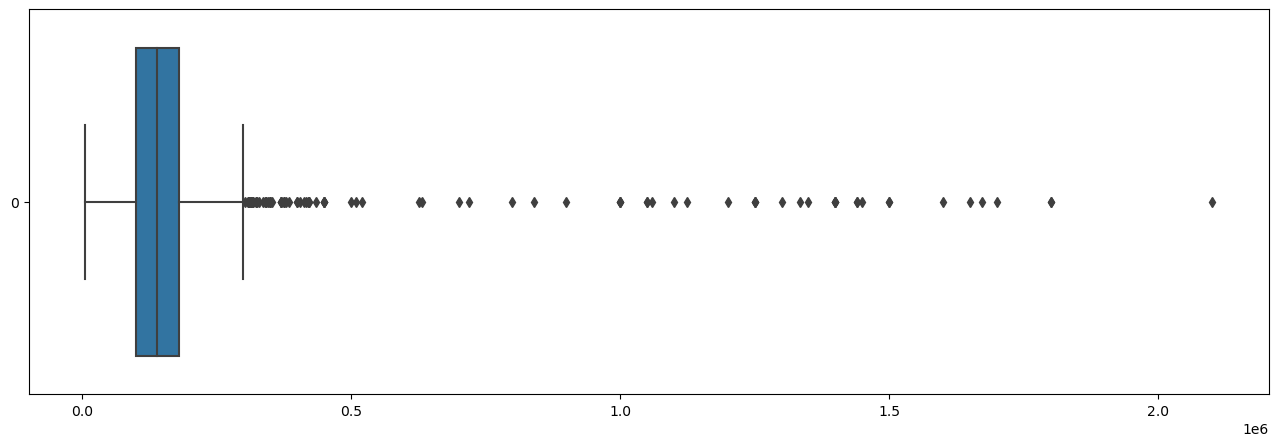

In [42]:
plt.figure(figsize=(16,5))
sns.boxplot(new_df['salary'],orient="h")

In [43]:
X=new_df.drop(columns=['salary'])
y=new_df['salary']

In [44]:
X.shape,y.shape

((4107, 9), (4107,))

In [45]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,confusion_matrix,ConfusionMatrixDisplay

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
onh=OneHotEncoder(sparse=False, handle_unknown='ignore')
stc=StandardScaler()
mscaler=MinMaxScaler()

In [48]:
tf1=ColumnTransformer(transformers=[
    ('onh',OneHotEncoder(sparse=False,handle_unknown="ignore"),[1,2,3,4,6,7,8]),
],remainder="passthrough")

In [49]:
tf1.set_params

<bound method ColumnTransformer.set_params of ColumnTransformer(remainder='passthrough',
                  transformers=[('onh',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 [1, 2, 3, 4, 6, 7, 8])])>

In [50]:
tf1.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('onh',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 [1, 2, 3, 4, 6, 7, 8])])>

In [51]:
tf2=ColumnTransformer(transformers=[
    ('stscaler',StandardScaler(),slice(0,20))
],remainder="passthrough")

In [52]:
tf2=ColumnTransformer(transformers=[
    ('ms',MinMaxScaler(),slice(0,235))
],remainder="passthrough")

In [53]:
tf2.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('ms', MinMaxScaler(), slice(0, 235, None))])>

In [54]:
Rg=LinearRegression()

In [55]:
pipe=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('rg',Rg),
])

In [56]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6, 7, 8])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ms', MinMaxScaler(),
                                                  slice(0, 235, None))])),
                ('rg', LinearRegression())])

In [57]:
y_pred=pipe.predict(X_test)

In [58]:
pipe.score(X_test,y_test)

0.7853397754013691

In [59]:
r2_score(y_test,y_pred)

0.7853397754013691

In [60]:
new_df.iloc[2677]

work_year                          2022
experience_level                     SE
employment_type                      FT
job_title             Applied Scientist
salary                         230000.0
salary_currency                     USD
salary_in_usd                    230000
employee_residence                   US
company_location                     US
company_size                          M
Name: 2683, dtype: object

In [61]:
pipe.predict(pd.DataFrame([[2022,'SE','FT','Applied Scientist','USD',205000,'US','US','M']],columns=['work_year','experience_level','employment_type','job_title','salary_currency','salary_in_usd','employee_residence','company_location','company_size']))

array([205446.03580386])

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
Dtr=DecisionTreeRegressor(criterion='absolute_error',random_state=55)

In [65]:
pipe=Pipeline([
    ('tf1',tf1),
    ('dtr',Dtr),
])
dtr_pipe=pipe

In [66]:
dtr_pipe.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6, 7, 8])])),
                ('dtr',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       random_state=55))])

In [67]:
y_pred=dtr_pipe.predict(X_test)

In [68]:
dtr_pipe.score(X_train, y_train)

0.9999986063423111

In [69]:
dtr_pipe.score(X_test,y_test)

0.9812171256242954

In [70]:
dtr_pipe.predict(pd.DataFrame([[2022,'SE','FT','Applied Scientist','USD',205000,'US','US','M']],columns=['work_year','experience_level','employment_type','job_title','salary_currency','salary_in_usd','employee_residence','company_location','company_size']))

array([205000.])

In [71]:
dtr_pipe.predict(pd.DataFrame([[2022,'SE','FT','Data Science Manager','USD',245100,'US','US','M']],columns=['work_year','experience_level','employment_type','job_title','salary_currency','salary_in_usd','employee_residence','company_location','company_size']))

array([245100.])

In [72]:
dtr_pipe.predict(pd.DataFrame([[2021,'MI','PT','Data Engineer','EUR',69741,'NL','NL','L']],columns=['work_year','experience_level','employment_type','job_title','salary_currency','salary_in_usd','employee_residence','company_location','company_size']))

array([59000.])

In [73]:
df.iloc[3999,:5]

work_year                    2021
experience_level               MI
employment_type                PT
job_title           Data Engineer
salary                    59000.0
Name: 3999, dtype: object

In [74]:
df.iloc[2661,:5]

work_year                           2022
experience_level                      SE
employment_type                       FT
job_title           Data Science Manager
salary                          245100.0
Name: 2661, dtype: object

In [75]:
df.iloc[2677,:5]

work_year                        2022
experience_level                   SE
employment_type                    FT
job_title           Applied Scientist
salary                       205000.0
Name: 2677, dtype: object

In [76]:
dtrs=r2_score(y_test,y_pred)

In [77]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [78]:
adsb=AdaBoostRegressor()

In [79]:
pipe=Pipeline([
    ('tf1',tf1),
    ('adas',adsb),
])

In [80]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6, 7, 8])])),
                ('adas', AdaBoostRegressor())])

In [81]:
y_pred1=pipe.predict(X_test)

In [82]:
adabr=r2_score(y_test,y_pred1)

In [83]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=150)

In [84]:
pipe=Pipeline([
    ('tf1',tf1),
    ('gbr',gbr),
])

In [85]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6, 7, 8])])),
                ('gbr', GradientBoostingRegressor(n_estimators=150))])

In [86]:
y_pred2=pipe.predict(X_test)

In [87]:
gbr=r2_score(y_test,y_pred2)

In [88]:
pipe.predict(pd.DataFrame([[2022,'SE','FT','Applied Scientist','USD',205000,'US','US','M']],columns=['work_year','experience_level','employment_type','job_title','salary_currency','salary_in_usd','employee_residence','company_location','company_size']))

array([204415.24062299])

In [89]:
pipe.predict(pd.DataFrame([[2021,'MI','PT','Data Engineer','EUR',69741,'NL','NL','L']],columns=['work_year','experience_level','employment_type','job_title','salary_currency','salary_in_usd','employee_residence','company_location','company_size']))

array([66048.08713198])

In [90]:
df.iloc[3999]

work_year                      2021
experience_level                 MI
employment_type                  PT
job_title             Data Engineer
salary                      59000.0
salary_currency                 EUR
salary_in_usd                 69741
employee_residence               NL
remote_ratio                    100
company_location                 NL
company_size                      L
Name: 3999, dtype: object

In [91]:
from xgboost import XGBRegressor

In [92]:
xgbr=XGBRegressor()

In [93]:
pipe=Pipeline([
    ('tf1',tf1),
    ('xgbr',xgbr),
])

In [94]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6, 7, 8])])),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_

In [95]:
y_pred=pipe.predict(X_test)

In [96]:
xgbr=pipe.score(X_test,y_test)

In [97]:
pipe.predict(pd.DataFrame([[2021,'MI','PT','Data Engineer','EUR',69741,'NL','NL','L']],columns=['work_year','experience_level','employment_type','job_title','salary_currency','salary_in_usd','employee_residence','company_location','company_size']))

array([59129.477], dtype=float32)

In [98]:
d={
    'Model Name':['Decision Tree Regressor','AdaBoost Regressor','GradientBoosting Regressor','XGB Regressor'],
    'Model Score':[dtrs,adabr,gbr,xgbr],
}

In [99]:
d

{'Model Name': ['Decision Tree Regressor',
  'AdaBoost Regressor',
  'GradientBoosting Regressor',
  'XGB Regressor'],
 'Model Score': [0.9812171256242954,
  0.8380852642289214,
  0.9827145189787863,
  0.9831688773393883]}

In [100]:
df=pd.DataFrame(d)
df

,Model Name,Model Score
0,Decision Tree Regressor,0.981217
1,AdaBoost Regressor,0.838085
2,GradientBoosting Regressor,0.982715
3,XGB Regressor,0.983169


**From these all model our ideal model is Decision**

In [101]:
df.iloc[0:1]

,Model Name,Model Score
0,Decision Tree Regressor,0.981217


**Dumping the our ideal model for implement in web application**

In [102]:
import pickle as pkl

In [103]:
pkl.dump(dtr_pipe,open("Decision_tree_reg_model.pkl","wb"))

In [104]:
model=pkl.load(open('/kaggle/working/Decision_tree_reg_model.pkl','rb'))

**After the Dump model then load and then i predicated**

In [105]:
model.predict(pd.DataFrame([[2021,'MI','PT','Data Engineer','EUR',69741,'NL','NL','L']],columns=['work_year','experience_level','employment_type','job_title','salary_currency','salary_in_usd','employee_residence','company_location','company_size']))

array([59000.])

In [106]:
model.predict(pd.DataFrame([[2022,'SE','FT','Applied Scientist','USD',205000,'US','US','M']],columns=['work_year','experience_level','employment_type','job_title','salary_currency','salary_in_usd','employee_residence','company_location','company_size']))

array([205000.])